In [1]:
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
from fake_identify import Are_you_IRA
import matplotlib
matplotlib.rcParams["font.size"] = 14
sns.set_style("darkgrid")
ira_c = sns.color_palette("coolwarm", 8)[7]
all_c = sns.color_palette("coolwarm", 8)[0]

Putin = Are_you_IRA()

## retweet reply and mention 交互

In [2]:
def num_of_interaction(G):
    """
    交互频率
    """
    print(G.number_of_nodes(), G.number_of_edges())
    freq_ira_as_n1 = []
    freq_ira_as_n2 = []
    freq_ira_toge = []

    for e in tqdm(G.edges(data=True)):
        if Putin.fuck(e[0]) and Putin.fuck(e[1]):
            freq_ira_toge.append(e[2]["weight"])
        if Putin.fuck(e[0]) and not Putin.fuck(e[1]):
            freq_ira_as_n1.append(e[2]["weight"])
        if Putin.fuck(e[1]) and not Putin.fuck(e[0]):
            freq_ira_as_n2.append(e[2]["weight"])

    freq_ira_as_n1 = pd.Series(freq_ira_as_n1)
    freq_ira_as_n2 = pd.Series(freq_ira_as_n2)
    freq_ira_toge = pd.Series(freq_ira_toge)
    
    print(freq_ira_as_n1.describe())
#     freq_ira_as_n1.hist()
#     plt.show()
#     plt.close()
    print(freq_ira_as_n2.describe())
#     freq_ira_as_n2.hist()
#     plt.show()
#     plt.close()
#     print(freq_ira_toge.describe())
    
    return freq_ira_as_n1, freq_ira_as_n2

In [3]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()


def get_G_char(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    k = G.number_of_edges() / G.number_of_nodes()

    out_d = pd.Series([k[1] for k in G.out_degree()])
    # print(out_d)
    ave_out_d = out_d.mean()
    std_out_d = out_d.std() / k
    max_out_d = out_d.max()

    in_d = pd.Series([k[1] for k in G.in_degree()])
    # print(in_d)
    ave_in_d = in_d.mean()
    std_in_d = in_d.std() / k
    max_in_d = in_d.max()

    return {
        "N nodes": n_nodes,
        "N edges": n_edges,
        "<k>": k,
        "std(k_out) / <k>": std_out_d,
        "std(k_in) / <k>": std_in_d,
        "max(k_out)": max_out_d,
        "max(k_in)": max_in_d,
    }        


def get_G_char_IRA(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    nodes = [uid for uid in putin.IRA_user_set if G.has_node(uid)]
    
    n_nodes = len(nodes)
    out_d = pd.Series([G.out_degree(n) for n in nodes])
    ave_k_out = out_d.sum() / n_nodes
    std_k_out = out_d.std() / ave_k_out
    max_out_d = out_d.max()

    in_d = pd.Series([G.in_degree(n) for n in nodes])
    ave_k_in = in_d.sum() / n_nodes
    std_k_in = in_d.std() / ave_k_in
    max_in_d = in_d.max()
    
    return {
        "N nodes": n_nodes,
        "<k_out>": ave_k_out,
        "<k_in>": ave_k_in,
        "std(k_out) / <k_out>": std_k_out,
        "std(k_in) / <k_in>": std_k_in,
        "max(k_out)": max_out_d,
        "max(k_in)": max_in_d,
    }


In [4]:
all_rst = {}
all_rst["retweeting"] = get_G_char("disk/ira-ret.gp")
all_rst["mentioning"] = get_G_char("disk/ira-men.gp")
all_rst["replying"] = get_G_char("disk/ira-rep.gp")
all_rst["quoting"] = get_G_char("disk/ira-quo.gp")

networks_char = pd.DataFrame(all_rst).transpose()
networks_char = networks_char[["N nodes", "N edges", "<k>", "std(k_out) / <k>", "std(k_in) / <k>", "max(k_out)", "max(k_in)"]]

networks_char.to_csv("data/table_all_inter.csv", float_format="%.1f")
networks_char

disk/ira-ret.gp ...
disk/ira-men.gp ...
disk/ira-rep.gp ...
disk/ira-quo.gp ...


,N nodes,N edges,<k>,std(k_out) / <k>,std(k_in) / <k>,max(k_out),max(k_in)
retweeting,154366.0,360265.0,2.333836,101.515416,13.832627,74754.0,6238.0
mentioning,70926.0,197644.0,2.786623,22.314064,12.883068,8371.0,8879.0
replying,14225.0,16775.0,1.179262,47.190944,6.514765,6076.0,660.0
quoting,19195.0,31538.0,1.643032,25.141455,12.666609,4879.0,1716.0


In [5]:
ira_rst = {}
ira_rst["retweeting"] = get_G_char_IRA("disk/ira-ret.gp")
ira_rst["mentioning"] = get_G_char_IRA("disk/ira-men.gp")
ira_rst["replying"] = get_G_char_IRA("disk/ira-rep.gp")
ira_rst["quoting"] = get_G_char_IRA("disk/ira-quo.gp")

networks_char = pd.DataFrame(ira_rst).transpose()
networks_char = networks_char[["N nodes", "<k_out>", "<k_in>", "std(k_out) / <k_out>", \
                               "std(k_in) / <k_in>", "max(k_out)", "max(k_in)"]]
networks_char

networks_char.to_csv("data/table_IRA_inter.csv", float_format="%.1f")
networks_char

disk/ira-ret.gp ...
disk/ira-men.gp ...
disk/ira-rep.gp ...
disk/ira-quo.gp ...


,N nodes,<k_out>,<k_in>,std(k_out) / <k_out>,std(k_in) / <k_in>,max(k_out),max(k_in)
retweeting,497.0,468.436620,261.961771,8.865644,1.930338,74754.0,6238.0
mentioning,508.0,353.080709,41.724409,1.828928,10.008341,8371.0,8879.0
replying,193.0,71.191710,16.430052,6.654323,3.899116,6076.0,660.0
quoting,353.0,36.390935,53.614731,8.313209,2.691440,4879.0,1716.0


In [6]:
%matplotlib inline

def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True):
    if maxi == 0:
        maxi = data.max()
        print("max(x):", maxi)
    if step == 0:
        step = int((maxi - mini) / 100)
        if step == 0:
            step = 1
    x = np.arange(mini, maxi, step, dtype=np.float32)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

In [14]:
G = nx.read_gpickle("disk/ira-ret.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

154366 360265



count    230070.000000
mean          2.464763
std           4.491968
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         202.000000
dtype: float64
count    127452.000000
mean          1.867134
std           4.127021
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         379.000000
dtype: float64


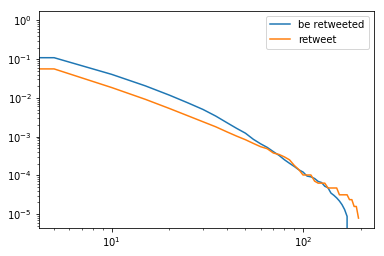

In [15]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be retweeted')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='retweet')
plt.legend()

In [16]:
G = nx.read_gpickle("disk/ira-rep.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

14225 16775



count    13604.000000
mean         1.179065
std          0.659684
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
dtype: float64
count    3035.000000
mean        1.616474
std         4.337203
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       164.000000
dtype: float64


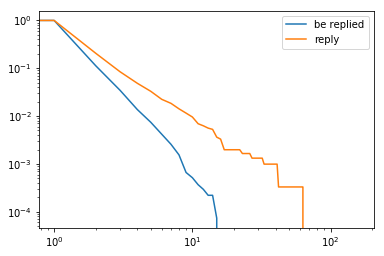

In [23]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 160, 1)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be replied')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 100, 1)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='reply')
plt.legend()

In [24]:
G = nx.read_gpickle("disk/ira-men.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

70926 197644



count    176448.000000
mean          1.835260
std           5.206205
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         782.000000
dtype: float64
count    18279.000000
mean         1.391980
std          1.507222
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        107.000000
dtype: float64


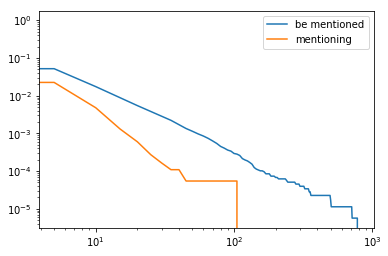

In [26]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 800, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be mentioned')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='mentioning')
plt.legend()

## 用户与ira的交互表

In [49]:
from collections import defaultdict
users = {}

def _init(_n):
    if _n not in users:
        users[_n] = {"user_id": _n,
                     "in_rep": 0, "out_rep": 0,
                     "in_men": 0, "out_men": 0,
                     "in_ret": 0, "out_ret": 0,
                     "in_quo": 0, "out_quo": 0,}

G = nx.read_gpickle("disk/ira-ret.gp")
for e in G.edges(data=True):
    _init(e[0]) 
    _init(e[1])  
    if Putin.fuck(e[1]):   
        users[e[0]]["out_ret"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_ret"] += e[2]["weight"]

G = nx.read_gpickle("disk/ira-rep.gp")
for e in G.edges(data=True):
    _init(e[0]) 
    _init(e[1])  
    
    if Putin.fuck(e[1]):
        users[e[0]]["out_rep"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_rep"] += e[2]["weight"]
    
G = nx.read_gpickle("disk/ira-men.gp")
for e in G.edges(data=True):
    _init(e[0]) 
    _init(e[1])
    
    if Putin.fuck(e[1]):
        users[e[0]]["out_men"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_men"] += e[2]["weight"]

G = nx.read_gpickle("disk/ira-quo.gp")
for e in G.edges(data=True):
    _init(e[0]) 
    _init(e[1])  
    
    if Putin.fuck(e[1]):
        users[e[0]]["out_quo"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_quo"] += e[2]["weight"]
    
    
# 剔除IRA
for uid in list(Putin.IRA_user_set):
    try:
        del users[uid]
    except:
        pass
    
users = pd.DataFrame(users).transpose()
# users

max(x): 444
max(x): 2766


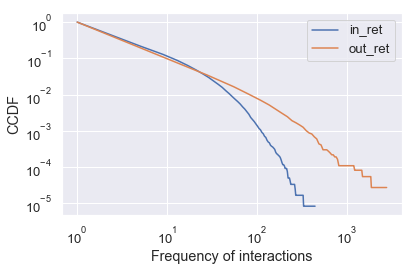

max(x): 5064
max(x): 107


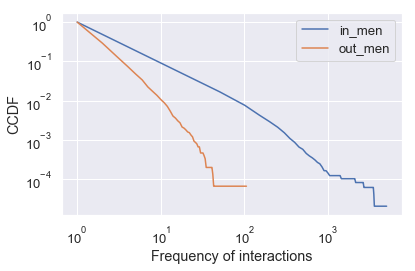

max(x): 29
max(x): 274


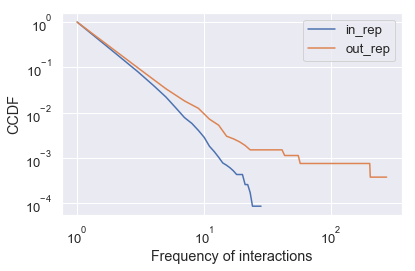

max(x): 49
max(x): 1113


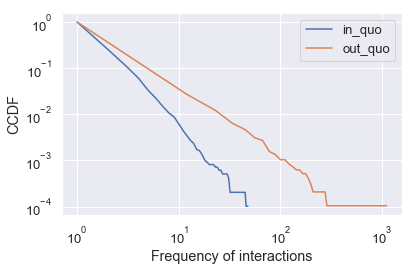

In [64]:
sns.set(style="darkgrid", font_scale=1.2)

for beh in ["ret", "men", "rep", "quo"]:
    
    plt.figure(figsize=(6, 4))
    # ax = plt.subplot(121)
    freq = pd.Series([v for v in users["in_" + beh] if v > 0])
    # print(freq.describe())
    x, cdf, pdf = get_cdf_pdf(freq, 1)
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(x, cdf, label="in_" + beh)

    # ax = plt.subplot(122)
    freq = pd.Series([v for v in users["out_" + beh] if v > 0])
    # print(freq.describe())
    x, cdf, pdf = get_cdf_pdf(freq, 1)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("CCDF")
    plt.xlabel("Frequency of interactions")
    plt.plot(x, cdf, label="out_" + beh)
    plt.legend()
    plt.tight_layout()
    plt.savefig("fig/Frequency of interactions {}.pdf".format(beh), dpi=300)
    plt.show(); plt.close()

## IRA的目标人群或是和IRA产生频繁交互的用户

发现：大量支持trump的用户主动与IRA互动

In [53]:
users.to_csv("data/users_with_ira.csv", index=None)
users = pd.read_csv("data/users_with_ira.csv", dtype=str)
users = users.astype({"in_ret": int, "out_ret": int, "in_men": int, "out_men": int,
                      "in_rep": int, "out_rep": int, "in_quo": int, "out_quo": int})

In [38]:
user_strump = {}
user_strump2 = {}

for line in tqdm(open("disk/user_support.txt")):
    w = line.strip().split(",")
    user_strump[w[0]] = 1 - int(w[1]) / int(w[2])
    user_strump2[w[0]] = 1 - float(w[3]) / int(w[2])

In [72]:
users = users.sort_values("in_ret", ascending=False)
print(len(users))
pro_trump = []
is_pro_trump = []
for _, row in tqdm(users.iterrows()):
    try:
        pro_trump.append(user_strump[row.user_id])
        if float(user_strump[row.user_id]) >= 0.5:
            is_pro_trump.append(1)
        else:
            is_pro_trump.append(0)
        # print(user_strump[str(row.user_id)])
        
    except Exception as e:
        # print(e)
        pro_trump.append(None)
        is_pro_trump.append(None)

users["supp_trump"] = pro_trump
users["is_trump"] = is_pro_trump
users = users.dropna() # 不能识别支持
print("After dropna", len(users))

168664


After dropna 168664


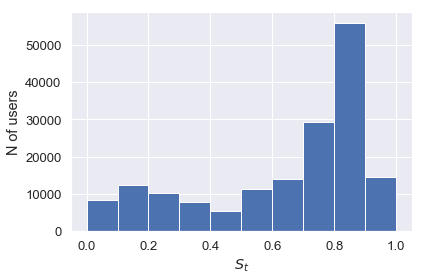

In [124]:
# sns.set("darkgrid", font_scale=1.2)

pro_trump = pd.Series(pro_trump)
plt.ylabel("N of users")
plt.xlabel("$S_{t}$")
pro_trump.hist(bins=10)
plt.tight_layout()
plt.savefig("fig/support_trump.pdf", dpi=300)
plt.show()

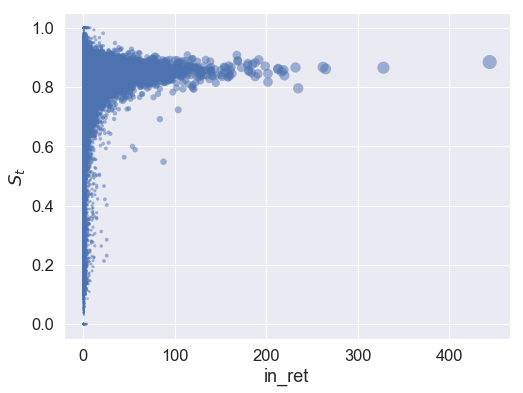

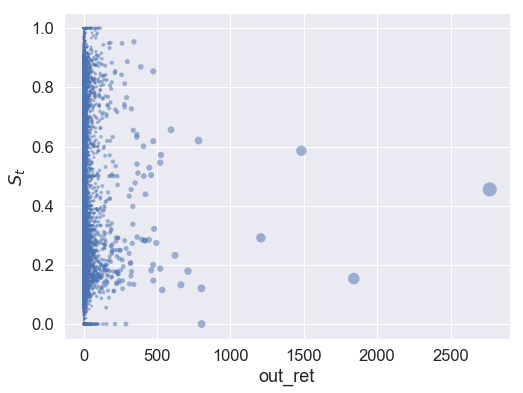

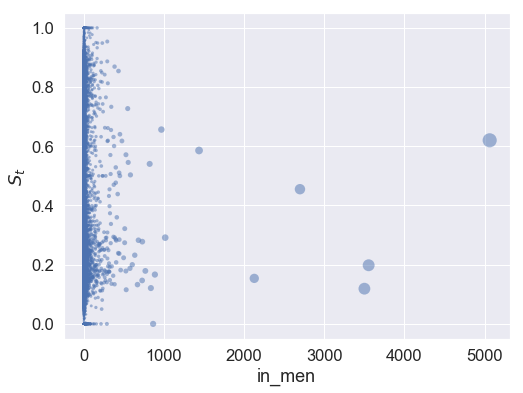

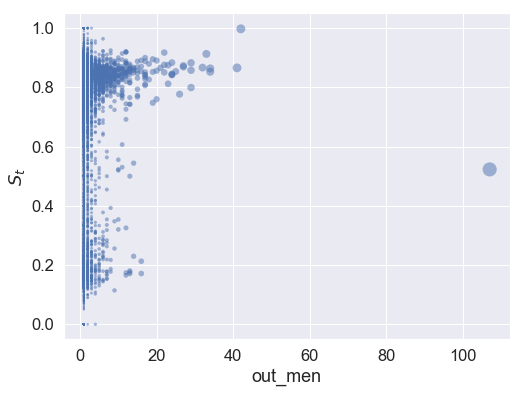

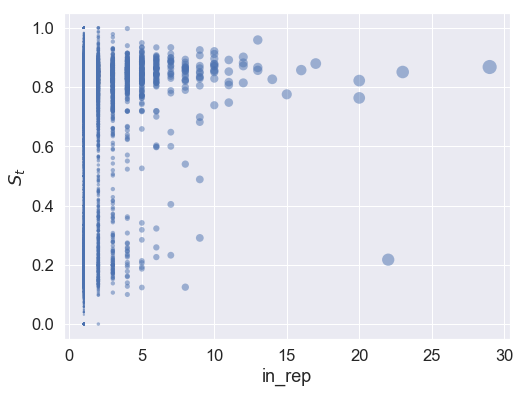

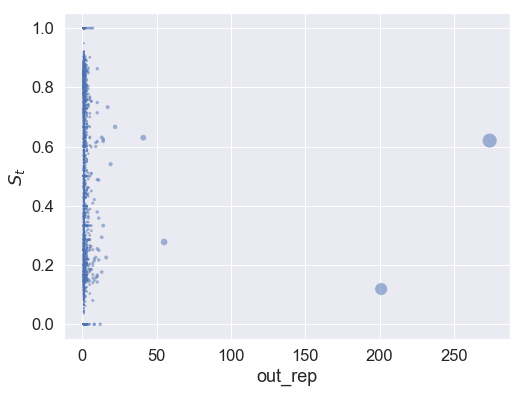

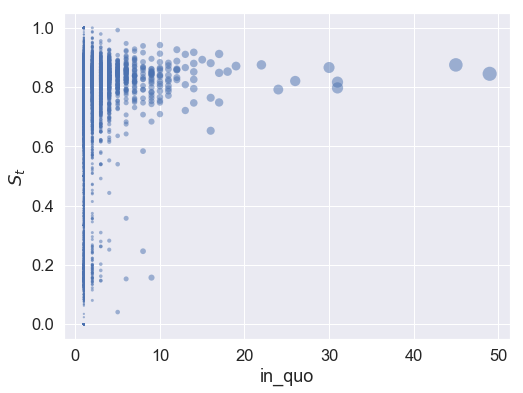

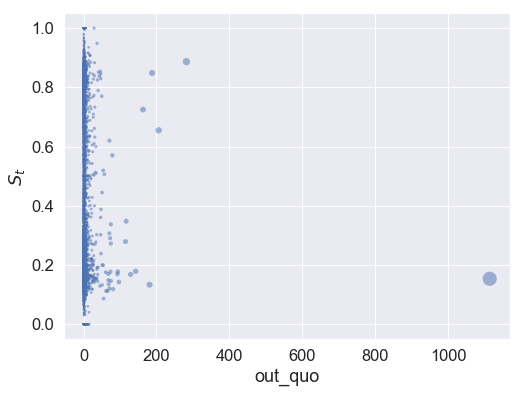

In [126]:
sns.set(style="darkgrid", font_scale=1.5)

for beh in ["in_ret", "out_ret", "in_men", "out_men", "in_rep", "out_rep", "in_quo", "out_quo"]:
    plt.figure(figsize=(8, 6))
    tmp = users[users[beh] > 0]
    sns.scatterplot(x=beh, y="supp_trump", size=beh, data=tmp, alpha=0.5, sizes=(5, 200), edgecolor="none", legend=False)
    plt.ylabel("$S_{t}$")
#     plt.legend(frameon=False)
    plt.savefig("fig/St_{}.png".format(beh), dpi=100)
    plt.show(); plt.close()

In [117]:
%matplotlib inline

def get_group(data, y, mini=0, maxi=0, step=0):
    if maxi == 0:
        maxi = data.max()
#         print("max(x):", maxi)
    if step == 0:
        step = int((maxi - mini) / 5)
        if step == 0:
            step = 1
        
    print(mini, maxi, step)
    x = np.arange(mini, maxi, step, dtype=int)
#     print(x)
    pdf = [[] for _ in range(len(x))] 
    for d, y_i in zip(data, y):

        if d < mini or d > maxi:
            continue

        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i].append(y_i)
            elif d >= x[i] and d < x[i+1]:
                pdf[i].append(y_i)
    
    pdf = [pd.Series(pdf[i]).mean() for i in range(len(x))]
    
    return x, pdf

In [118]:
for beh in ["in_ret", "out_ret", "in_men", "out_men", "in_rep", "out_rep", "in_quo", "out_quo"]:
#     plt.figure(figsize=(8, 6))
    tmp = users[users[beh] > 0]
    x, y = get_group(tmp[beh], tmp["is_trump"])
#     plt.plot(x, y)
#     sns.scatterplot(x=beh, y="is_trump", size=beh, data=tmp, alpha=0.5, sizes=(5, 200), edgecolor="none", legend=False)
#     plt.ylabel("$S_{t}$")
#     plt.legend(frameon=False)
#     plt.savefig("fig/St and {}.pdf".format(beh), dpi=100)
#     plt.show(); plt.close()

0 444 88
0 2766 553
0 5064 1012
0 107 21
0 29 5
0 274 54
0 49 9
0 1113 222


## IRA主动交互的是谁呢？

补充name及粉丝数等信息

In [136]:
user_data = {}

for line in tqdm(open("disk/user_info.json")):
    w = line.strip().split(",")
    if int(w[2]) >= 1 and int(w[3]) >= 1:
        user_data[w[0]] = {
            "user_id": w[0],
            "name": w[1],
            "fol": int(w[2]),
            "fri": int(w[3]),
        }

In [147]:
name = []
fol = []
fri = []

print("Before dropna", len(users))
for _, row in tqdm(users.iterrows()):
    try:
        name.append(user_data[row.user_id]["name"])
        fol.append(user_data[row.user_id]["fol"])
        fri.append(user_data[row.user_id]["fri"])
    except Exception as e:
        name.append(None)
        fol.append(None)
        fri.append(None)

users["name"] = name
users["follower_count"] = fol
users["following_count"] = fri
users = users.dropna() # 不能识别支持
print("After dropna", len(users))

Before dropna 167912


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


After dropna 167912


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [148]:
users.head()

,in_men,in_quo,in_rep,in_ret,out_men,out_quo,out_rep,out_ret,user_id,supp_trump,is_trump,name,follower_count,following_count
0,0,0,0,444,2,0,0,0,884311340,0.884479,1,bfrasier1951,1501,1202
1,0,0,0,328,0,0,0,0,420502656,0.865308,1,lawdawgseven,635,495
2,0,0,0,265,4,0,0,0,4886213447,0.861500,1,Paolalopez1971,1759,851
3,0,0,0,262,4,0,0,0,154228382,0.867193,1,glassyelegance,846,120
4,0,0,2,235,0,0,0,0,718978155327803392,0.795791,1,Mutt1961,47,16


In [152]:
# for beh in ["in_ret", "out_ret", "in_men", "out_men", "in_rep", "out_rep", "in_quo", "out_quo"]:
for beh in ["out_ret", "in_men", "out_rep", "out_quo"]:
    sort_people = users.sort_values(beh, ascending=False)[:20]
    sort_people = sort_people[["name", beh, "follower_count", "following_count"]]
    display(sort_people)
#     sort_people.to_csv("users_rank_by_{}.csv".format(beh), index=None)

,name,out_ret,follower_count,following_count
159678,blicqer,2766,83897,71257
159069,TalibKweli,1840,1099112,5009
157736,RT_com,1483,2445241,593
159544,thehill,1207,1564409,647
158818,rapstationradio,803,5425,830
160147,thetrudz,802,52687,1137
159534,realDonaldTrump,782,16444691,46
159658,FeministaJones,710,111396,2305
159562,chiefplan1,662,3293,5009
159584,guardian,622,6075611,1115


,name,in_men,follower_count,following_count
159534,realDonaldTrump,5064,16444691,46
159828,midnight,3554,561805,1436
159448,HillaryClinton,3501,11435589,760
159678,blicqer,2697,83897,71257
159069,TalibKweli,2127,1099112,5009
157736,RT_com,1438,2445241,593
159544,thehill,1016,1564409,647
159548,josephjett,968,113310,21939
121949,YouTube,887,64567728,961
158818,rapstationradio,865,5425,830


,name,out_rep,follower_count,following_count
159534,realDonaldTrump,274,16444691,46
159448,HillaryClinton,201,11435589,760
158934,CNN,55,29893365,1122
29727,TrumpNation22,41,1732,2021
121313,Yng_God,22,782,1139
159475,FoxNews,19,11971264,431
12846,JaredWyand,17,132808,9964
154760,robbstarklivesx,16,1639,1907
120792,MurphybeGood,14,70,100
159550,DRUDGE_REPORT,14,1091537,2


,name,out_quo,follower_count,following_count
159069,TalibKweli,1113,1099112,5009
158992,AbnInfVet,282,31644,31704
40516,cmdorsey,206,11955,13003
15151,abusedtaxpayer,188,7375,7316
159732,JoyAnnReid,181,386636,3657
37670,ihatethemedia,163,8938,1240
159658,FeministaJones,143,111396,2305
160222,djolder,129,30648,6322
158180,KingJohnLove,117,4128,998
158031,cutupx2,115,12070,7420
